In [1]:
# Loading Packages

import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 13)

In [3]:
# Reading data

train=pd.read_csv("train_ctrUa4K.csv") 
test=pd.read_csv("test_lAUu6dG.csv")

In [4]:
train_original=train.copy() 
test_original=test.copy()

In [ ]:
train.columns

In [ ]:
test.columns

In [ ]:
train.shape

In [ ]:
test.shape

In [5]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
train.dtypes

In [10]:
train.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002692,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [11]:
train.describe(include=float)

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,592.000000,600.00000,564.000000
mean,1621.245798,146.412162,342.00000,0.842199
std,2926.248369,85.587325,65.12041,0.364878
min,0.000000,9.000000,12.00000,0.000000
25%,0.000000,100.000000,360.00000,1.000000
50%,1188.500000,128.000000,360.00000,1.000000
75%,2297.250000,168.000000,360.00000,1.000000
max,41667.000000,700.000000,480.00000,1.000000


In [ ]:
gender, married, dependents, self_employed have missing value

In [ ]:
train['Dependents'].value_counts()

In [9]:
train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
train[train['Gender'].isnull() | train['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
# For numerical variables: imputation using mean or median
# For categorical variables: imputation using mode

In [17]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [19]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [20]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
train.isnull().sum()

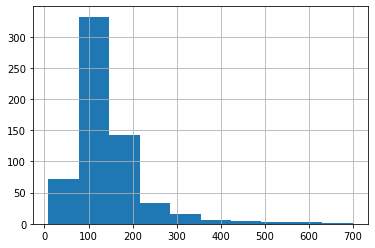

In [21]:
train['LoanAmount'].hist()

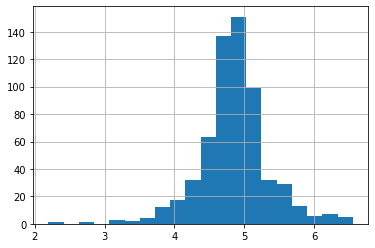

In [22]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [23]:
train['ApplicantIncome'].idxmax()

409

In [24]:
train['ApplicantIncome'].idxmin()

216

In [ ]:
bins=[0,1000,3000,42000]

In [25]:
def test(number):
    if 0<number<1000:
       return "Low"
    elif 1000<=number<=3000:
        return "Medium"
    else:
        return "High"

In [26]:
train['incomestatus'] = train['ApplicantIncome'].apply(test)

In [27]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,...,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,incomestatus
0,LP001002,Male,No,0,Graduate,No,...,360.0,1.0,Urban,Y,4.852030,High
1,LP001003,Male,Yes,1,Graduate,No,...,360.0,1.0,Rural,N,4.852030,High
2,LP001005,Male,Yes,0,Graduate,Yes,...,360.0,1.0,Urban,Y,4.189655,Medium
3,LP001006,Male,Yes,0,Not Graduate,No,...,360.0,1.0,Urban,Y,4.787492,Medium
4,LP001008,Male,No,0,Graduate,No,...,360.0,1.0,Urban,Y,4.948760,High
5,LP001011,Male,Yes,2,Graduate,Yes,...,360.0,1.0,Urban,Y,5.587249,High
6,LP001013,Male,Yes,0,Not Graduate,No,...,360.0,1.0,Urban,Y,4.553877,Medium
7,LP001014,Male,Yes,3+,Graduate,No,...,360.0,0.0,Semiurban,N,5.062595,High
8,LP001018,Male,Yes,2,Graduate,No,...,360.0,1.0,Urban,Y,5.123964,High
9,LP001020,Male,Yes,1,Graduate,No,...,360.0,1.0,Semiurban,N,5.855072,High


In [28]:
train.drop('incomestatus',axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,...,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,...,128.0,360.0,1.0,Urban,Y,4.852030
1,LP001003,Male,Yes,1,Graduate,No,...,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,...,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,...,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,...,141.0,360.0,1.0,Urban,Y,4.948760
5,LP001011,Male,Yes,2,Graduate,Yes,...,267.0,360.0,1.0,Urban,Y,5.587249
6,LP001013,Male,Yes,0,Not Graduate,No,...,95.0,360.0,1.0,Urban,Y,4.553877
7,LP001014,Male,Yes,3+,Graduate,No,...,158.0,360.0,0.0,Semiurban,N,5.062595
8,LP001018,Male,Yes,2,Graduate,No,...,168.0,360.0,1.0,Urban,Y,5.123964
9,LP001020,Male,Yes,1,Graduate,No,...,349.0,360.0,1.0,Semiurban,N,5.855072


In [32]:
train['Gender'].mode()[0]

'Male'

In [31]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

KeyError: "['Loan_ID'] not found in axis"

In [33]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [34]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,incomestatus
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655,Medium
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492,Medium
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760,High


In [35]:
X=pd.get_dummies(X) 
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,incomestatus_High,incomestatus_Low,incomestatus_Medium
0,5849,0.000000,128.0,360.0,1.0,4.852030,...,0,0,1,1,0,0
1,4583,1508.000000,128.0,360.0,1.0,4.852030,...,1,0,0,1,0,0
2,3000,0.000000,66.0,360.0,1.0,4.189655,...,0,0,1,0,0,1
3,2583,2358.000000,120.0,360.0,1.0,4.787492,...,0,0,1,0,0,1
4,6000,0.000000,141.0,360.0,1.0,4.948760,...,0,0,1,1,0,0
5,5417,4196.000000,267.0,360.0,1.0,5.587249,...,0,0,1,1,0,0
6,2333,1516.000000,95.0,360.0,1.0,4.553877,...,0,0,1,0,0,1
7,3036,2504.000000,158.0,360.0,0.0,5.062595,...,0,1,0,1,0,0
8,4006,1526.000000,168.0,360.0,1.0,5.123964,...,0,0,1,1,0,0
9,12841,10968.000000,349.0,360.0,1.0,5.855072,...,0,1,0,1,0,0


In [36]:
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [38]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [39]:
model = LogisticRegression() 
model.fit(x_train, y_train)

C:\Users\Khanh Pham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
pred_cv = model.predict(x_cv)

In [42]:
pred_cv

array(['N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N

In [ ]:
model.intercept_

In [43]:
accuracy_score(y_cv,pred_cv)

0.8108108108108109

In [ ]:
# Taking care of missing data
from sklearn.preprocessing improt Imputer
imputer = Imputer(missing_values = 'NaN', strategy='mean', axis = 0)
imputer = imputer.fit(X[:,])